In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FormatStrFormatter
import pandas as pd
import matplotlib as mpl
import random
import seaborn as sns
from scipy import interpolate
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [2]:
mpl.rcParams['pdf.fonttype'] = 42
# Set font and set mathtext font the same with text font
mpl.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})
mpl.rcParams['mathtext.default'] = 'regular'
# Set tick size globally
# Set tick size globally
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['figure.facecolor'] = 'w'
mpl.rcParams['legend.fontsize'] = 14
plt.close("all")


In [3]:
####  Fig. 3,4 MCMC inversion results

In [4]:
# read the proxy data
d13c_proxy = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'd13c_carbonate', index_col = 'Age')
# trim the data
d13c_proxy = d13c_proxy[d13c_proxy.index>=251.902 ]
d13c_proxy = d13c_proxy[d13c_proxy.index<=252.00 ]
d13c_sm = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'd13c_sm')
d13c_proxy['fsilw11'] = d13c_proxy['d13c'] - 2.9256 

d18o_proxy = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'd18o', index_col = 'Age')
d18o_proxy = d18o_proxy[d18o_proxy.index>=251.902 ]
d18o_proxy = d18o_proxy[d18o_proxy.index<=252.00 ]
d18o_sm = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'd18o_sm', index_col = 'Age')
d18o_sm = d18o_sm[d18o_sm.index>= 251.902 ]
d18o_sm = d18o_sm[d18o_sm.index<= 252.001 ]

d18o_meishan = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'd18o', index_col = 'Age')
d18o_meishan = d18o_meishan[d18o_meishan['Section']=='Meishan']
d18o_meishan = d18o_meishan[d18o_meishan['reference']=='Chen et al., 2016']



ph_proxy = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'pH')


pco2_proxy = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'Normalized pCO2')
pco2_proxy.loc[pco2_proxy.Age>252.0, 'Age']=252.005
pco2_proxy.loc[pco2_proxy.Age==251.89, 'Age']=251.898
# pco2_proxy['low_sd'] = pco2_proxy['pCO2'] - pco2_proxy['pCO2_low']
# pco2_proxy['high_sd'] = pco2_proxy['pCO2_high'] - pco2_proxy['pCO2']
 
sr_meishan_proxy = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'Sr_Meishan')
sr_curve = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'Sr_curve', skiprows=[1])

d18o_proxy['Relative_T'] = (d18o_proxy['d18O'] - 19.98493008) * -4.22

In [5]:
# check section information, for the convenience of legend plotting

ls_c = d13c_proxy['Section'].unique()
ls_o = d18o_proxy['Section'].unique()

random.seed(8)
default = sns.color_palette("Set2", len(ls_c))

seq = random.sample(range(len(ls_c)),len(ls_c))
d13c_palette = {
    ls_c[i]: default[j] for i, j in zip(range(len(ls_c)), seq)
}
d18o_palette = {
    ls_o[i]: [] for i in range(len(ls_o))
}
pco2_palette = {
    'Shangsi': d13c_palette['Shangsi']
}

In [7]:
# compile results from 2000 forward experiments
# exp_name = 'd13c_sens_test_Meishan' 


# exp_name = 'd13c_sens_test_sclim_6'
# exp_name = 'd13c_sens_test_nsi_6' 
# exp_name = 'd13c_sens_test_fsilw_11'  
# exp_name = 'd13c_sens_test_alpha_100'
# exp_name = 'd13c_sens_test_orgw'
# exp_name = 'd13c_sens_test_fw_80'
# exp_name = 'd13c_sens_test_sr'
# exp_name = 'd13c_sens_test_interval'
# exp_name = 'd13c_sens_test_pco2_850'

exp_name = 'd13c_sens_test_timelag_80'

folder = 'mcmc_forward_results'

# d13c_emi_mcmc = np.loadtxt(f'./mcmc_results_processing/d13c_emi_inv_{exp_name}.dat').T

# forcings
# m, n = d13c_emi_mcmc.shape
n = len(next(os.walk(f'./{folder}/{exp_name}'))[1])
# samples = np.load(f'./{folder}/{exp_name}.npy')
# pr = np.loadtxt(f'./{folder}/ln_{exp_name}.dat')
# index = pr.argsort()[-n:][::-1]

forcing_mcmc = np.load(f'./{folder}/{exp_name}_forcing_mcmc.npy').T



try:
    temp_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'Temperature', index_col = [0])
    
    pco2_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'pco2', index_col = [0])
    d13c_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'd13c', index_col = [0])
    ph_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'ph', index_col = [0])
    dox_interm_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'dox_interm', index_col = [0])
    dox_deep_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'dox_deep', index_col = [0])
    po4_ave_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'po4_ave', index_col = [0])
    sr_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'sr', index_col = [0])
    
    r_fsilw_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'r_fsilw', index_col = [0])
    r_fcarbw_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'r_fcarbw', index_col = [0])

    r_fpw_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'r_fpw', index_col = [0])
    r_ffep_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'r_ffep', index_col = [0])
    r_fcap_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'r_fcap', index_col = [0])
    
    
    fbP_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'FbP', index_col = [0])
    forgp_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'ForgP', index_col = [0])
    focb_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'ForgC', index_col = [0])
    
except:
    print('I am here')
    Age = np.round(np.arange(-252.03e6, -251.90e6,2e3),3)

    cols_temp, cols_pco2, cols_d13c, cols_ph = {}, {}, {}, {}
    cols_dox_i, cols_dox_d, cols_po4, cols_sr = {}, {}, {}, {}
    cols_fsilw, cols_fcarbw, cols_fpw = {}, {}, {}
    cols_ffep, cols_fcap, cols_forgp, cols_focb = {}, {}, {}, {}
    cols_fbp = {}
    
    for i in range(n):
        col = f"rank_{i}"
    
        cols_temp[col] = pd.read_csv(f'./{folder}/{exp_name}/{i}/tcb.csv', usecols=[1]).to_numpy().ravel() - 22
        cols_pco2[col] = pd.read_csv(f'./{folder}/{exp_name}/{i}/pco2_d13c.csv', usecols=[1]).to_numpy().ravel()
    
        s = pd.read_csv(f'./{folder}/{exp_name}/{i}/Surface_dic_alk_d13c_ph_dox.csv',
                        usecols=[3,4,6,7,8]).to_numpy()
        cols_d13c[col]  = s[:, 0]
        cols_ph[col]    = s[:, 1]
        cols_dox_i[col] = s[:, 2]
        cols_dox_d[col] = s[:, 3]
        cols_po4[col]   = s[:, 4]
    
        cols_sr[col] = pd.read_csv(f'./{folder}/{exp_name}/{i}/Sr.csv', usecols=[1]).to_numpy().ravel()
    
        f = pd.read_csv(f'./{folder}/{exp_name}/{i}/flux.csv', usecols=[2,3,4,5,6,7,8]).to_numpy()
        cols_fsilw[col]  = f[:, 0]
        cols_fcarbw[col] = f[:, 1]
        cols_fpw[col]    = f[:, 2]
        cols_ffep[col]   = f[:, 3]
        cols_fcap[col]   = f[:, 4]
        cols_forgp[col]  = f[:, 5]
        cols_focb[col]   = f[:, 6]
    
        cols_fbp[col] = cols_ffep[col]*1.32e10 + cols_fcap[col]*5.28e10/2 + cols_forgp[col]
    
    # build DataFrames once (no fragmentation)
    temp_mcmc        = pd.DataFrame(cols_temp,   index=Age); temp_mcmc.index.name = "Age"
    pco2_mcmc        = pd.DataFrame(cols_pco2,   index=Age); pco2_mcmc.index.name = "Age"
    d13c_mcmc        = pd.DataFrame(cols_d13c,   index=Age); d13c_mcmc.index.name = "Age"
    ph_mcmc          = pd.DataFrame(cols_ph,     index=Age); ph_mcmc.index.name = "Age"
    dox_interm_mcmc  = pd.DataFrame(cols_dox_i,  index=Age); dox_interm_mcmc.index.name = "Age"
    dox_deep_mcmc    = pd.DataFrame(cols_dox_d,  index=Age); dox_deep_mcmc.index.name = "Age"
    po4_ave_mcmc     = pd.DataFrame(cols_po4,    index=Age); po4_ave_mcmc.index.name = "Age"
    sr_mcmc          = pd.DataFrame(cols_sr,     index=Age); sr_mcmc.index.name = "Age"
    r_fsilw_mcmc     = pd.DataFrame(cols_fsilw,  index=Age); r_fsilw_mcmc.index.name = "Age"
    r_fcarbw_mcmc    = pd.DataFrame(cols_fcarbw, index=Age); r_fcarbw_mcmc.index.name = "Age"
    r_fpw_mcmc       = pd.DataFrame(cols_fpw,    index=Age); r_fpw_mcmc.index.name = "Age"
    r_ffep_mcmc      = pd.DataFrame(cols_ffep,   index=Age); r_ffep_mcmc.index.name = "Age"
    r_fcap_mcmc      = pd.DataFrame(cols_fcap,   index=Age); r_fcap_mcmc.index.name = "Age"
    forgp_mcmc       = pd.DataFrame(cols_forgp,  index=Age); forgp_mcmc.index.name = "Age"
    focb_mcmc        = pd.DataFrame(cols_focb,   index=Age); focb_mcmc.index.name = "Age"
    fbP_mcmc         = pd.DataFrame(cols_fbp,    index=Age); fbP_mcmc.index.name = "Age"
    
    writer = pd.ExcelWriter(f'./data/mcmc_{exp_name}_results.xlsx')
    temp_mcmc.to_excel(writer,sheet_name='Temperature')
    pco2_mcmc.to_excel(writer,sheet_name='pco2')
    d13c_mcmc.to_excel(writer,sheet_name='d13c')
    ph_mcmc.to_excel(writer,sheet_name='ph')
    dox_interm_mcmc.to_excel(writer,sheet_name='dox_interm')
    dox_deep_mcmc.to_excel(writer,sheet_name='dox_deep')
    po4_ave_mcmc.to_excel(writer,sheet_name='po4_ave')
    sr_mcmc.to_excel(writer,sheet_name='sr')
    r_fsilw_mcmc.to_excel(writer,sheet_name='r_fsilw')
    r_fcarbw_mcmc.to_excel(writer,sheet_name='r_fcarbw')
    r_fpw_mcmc.to_excel(writer,sheet_name='r_fpw')
    r_ffep_mcmc.to_excel(writer,sheet_name='r_ffep')
    r_fcap_mcmc.to_excel(writer,sheet_name='r_fcap')
    
    forgp_mcmc.to_excel(writer,sheet_name='ForgP')
    focb_mcmc.to_excel(writer,sheet_name='ForgC')
    fbP_mcmc.to_excel(writer, sheet_name='FbP')

    writer.close()

I am here


In [8]:
# get the quantile

def add_mean(q):
    q = q.rename(columns={0.025: 'q2.5', 0.5: 'median', 0.975: 'q97.5'})
    q['mean'] = q[['q2.5', 'median', 'q97.5']].mean(axis=1)
    return q

temp_q = temp_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
pco2_q = pco2_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
ph_q = ph_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
sr_q = sr_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
dox_interm_q = dox_interm_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
dox_deep_q =  dox_deep_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
d13c_q = d13c_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
po4_ave_q = po4_ave_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T

r_fsilw_q = r_fsilw_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
r_fcarbw_q = r_fcarbw_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
r_fpw_q = r_fpw_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
r_ffep_q = r_ffep_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
r_fcap_q = r_fcap_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T

forgp_q = forgp_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
focb_q = focb_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
fbP_q = fbP_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T

temp_q        = add_mean(temp_q)
pco2_q        = add_mean(pco2_q)
ph_q          = add_mean(ph_q)
sr_q          = add_mean(sr_q)
dox_interm_q  = add_mean(dox_interm_q)
dox_deep_q    = add_mean(dox_deep_q)
d13c_q        = add_mean(d13c_q)
po4_ave_q     = add_mean(po4_ave_q)

r_fsilw_q     = add_mean(r_fsilw_q)
r_fcarbw_q    = add_mean(r_fcarbw_q)
r_fpw_q       = add_mean(r_fpw_q)
r_ffep_q      = add_mean(r_ffep_q)
r_fcap_q      = add_mean(r_fcap_q)

forgp_q       = add_mean(forgp_q)
focb_q        = add_mean(focb_q)
fbP_q         = add_mean(fbP_q)

writer = pd.ExcelWriter(f'./data/mcmc_{exp_name}_quantile_results.xlsx')
(temp_q-temp_q.iloc[0,:]).to_excel(writer,sheet_name='Temperature')
pco2_q.to_excel(writer,sheet_name='pco2')
d13c_q.to_excel(writer,sheet_name='d13c')
(ph_q - ph_q.iloc[0,:]).to_excel(writer,sheet_name='ph')
dox_interm_q.to_excel(writer,sheet_name='dox_interm')
dox_deep_q.to_excel(writer,sheet_name='dox_deep')
po4_ave_q.to_excel(writer,sheet_name='po4_ave')
sr_q.to_excel(writer,sheet_name='sr')
r_fsilw_q.to_excel(writer,sheet_name='r_fsilw')
r_fcarbw_q.to_excel(writer,sheet_name='r_fcarbw')
r_fpw_q.to_excel(writer,sheet_name='r_fpw')
r_ffep_q.to_excel(writer,sheet_name='r_ffep')
r_fcap_q.to_excel(writer,sheet_name='r_fcap')
forgp_q.to_excel(writer,sheet_name='ForgP')
focb_q.to_excel(writer,sheet_name='ForgC')
fbP_q.to_excel(writer,sheet_name='FbP')

writer.close()

In [9]:
pco2_proxy = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'Normalized pCO2')
pco2_proxy.loc[pco2_proxy.Age>252.0, 'Age']=252.005
pco2_proxy.loc[pco2_proxy.Age==251.89, 'Age']=251.898
scale = 1.4
pco2_proxy.iloc[38:46,6] *= scale
pco2_proxy.iloc[38:46,8] *= scale
pco2_proxy.iloc[38:46,10] *= scale
pco2_proxy.iloc[38:46,:]

,Age,pCO2,pCO2_low,pCO2_high,proxy,background,normalized,normalized_low,low_sd,normalized_high,high_sd,Ref
38,251.894366,693.171720,676.556254,731.941141,"Phytane, Shen et al., 2023",270.37,3.589305,2.502335,0.086036,2.707183,0.200752,"Shen et al., 2023"
39,251.900947,607.301904,592.744755,641.268585,"Phytane, Shen et al., 2023",270.37,3.144663,2.192347,0.075378,2.371819,0.175883,"Shen et al., 2023"
40,251.902000,576.793596,562.967737,609.053933,"Phytane, Shen et al., 2023",270.37,2.986689,2.082212,0.071592,2.252668,0.167047,"Shen et al., 2023"
41,251.910571,582.275852,568.318582,614.842814,"Phytane, Shen et al., 2023",270.37,3.015076,2.102003,0.072272,2.274079,0.168635,"Shen et al., 2023"
42,251.920214,388.717227,379.399597,410.458365,"Phytane, Shen et al., 2023",270.37,2.012813,1.403261,0.048248,1.518136,0.112578,"Shen et al., 2023"
43,251.927714,358.146840,349.561988,378.178161,"Phytane, Shen et al., 2023",270.37,1.854516,1.292902,0.044453,1.398743,0.103724,"Shen et al., 2023"
44,251.940036,270.364924,263.884222,285.486561,"Phytane, Shen et al., 2023",270.37,1.399974,0.976011,0.033558,1.055911,0.078301,"Shen et al., 2023"
45,251.950000,386.015337,376.762471,407.605356,"Phytane, Shen et al., 2023",270.37,1.998822,1.393507,0.047912,1.507584,0.111795,"Shen et al., 2023"


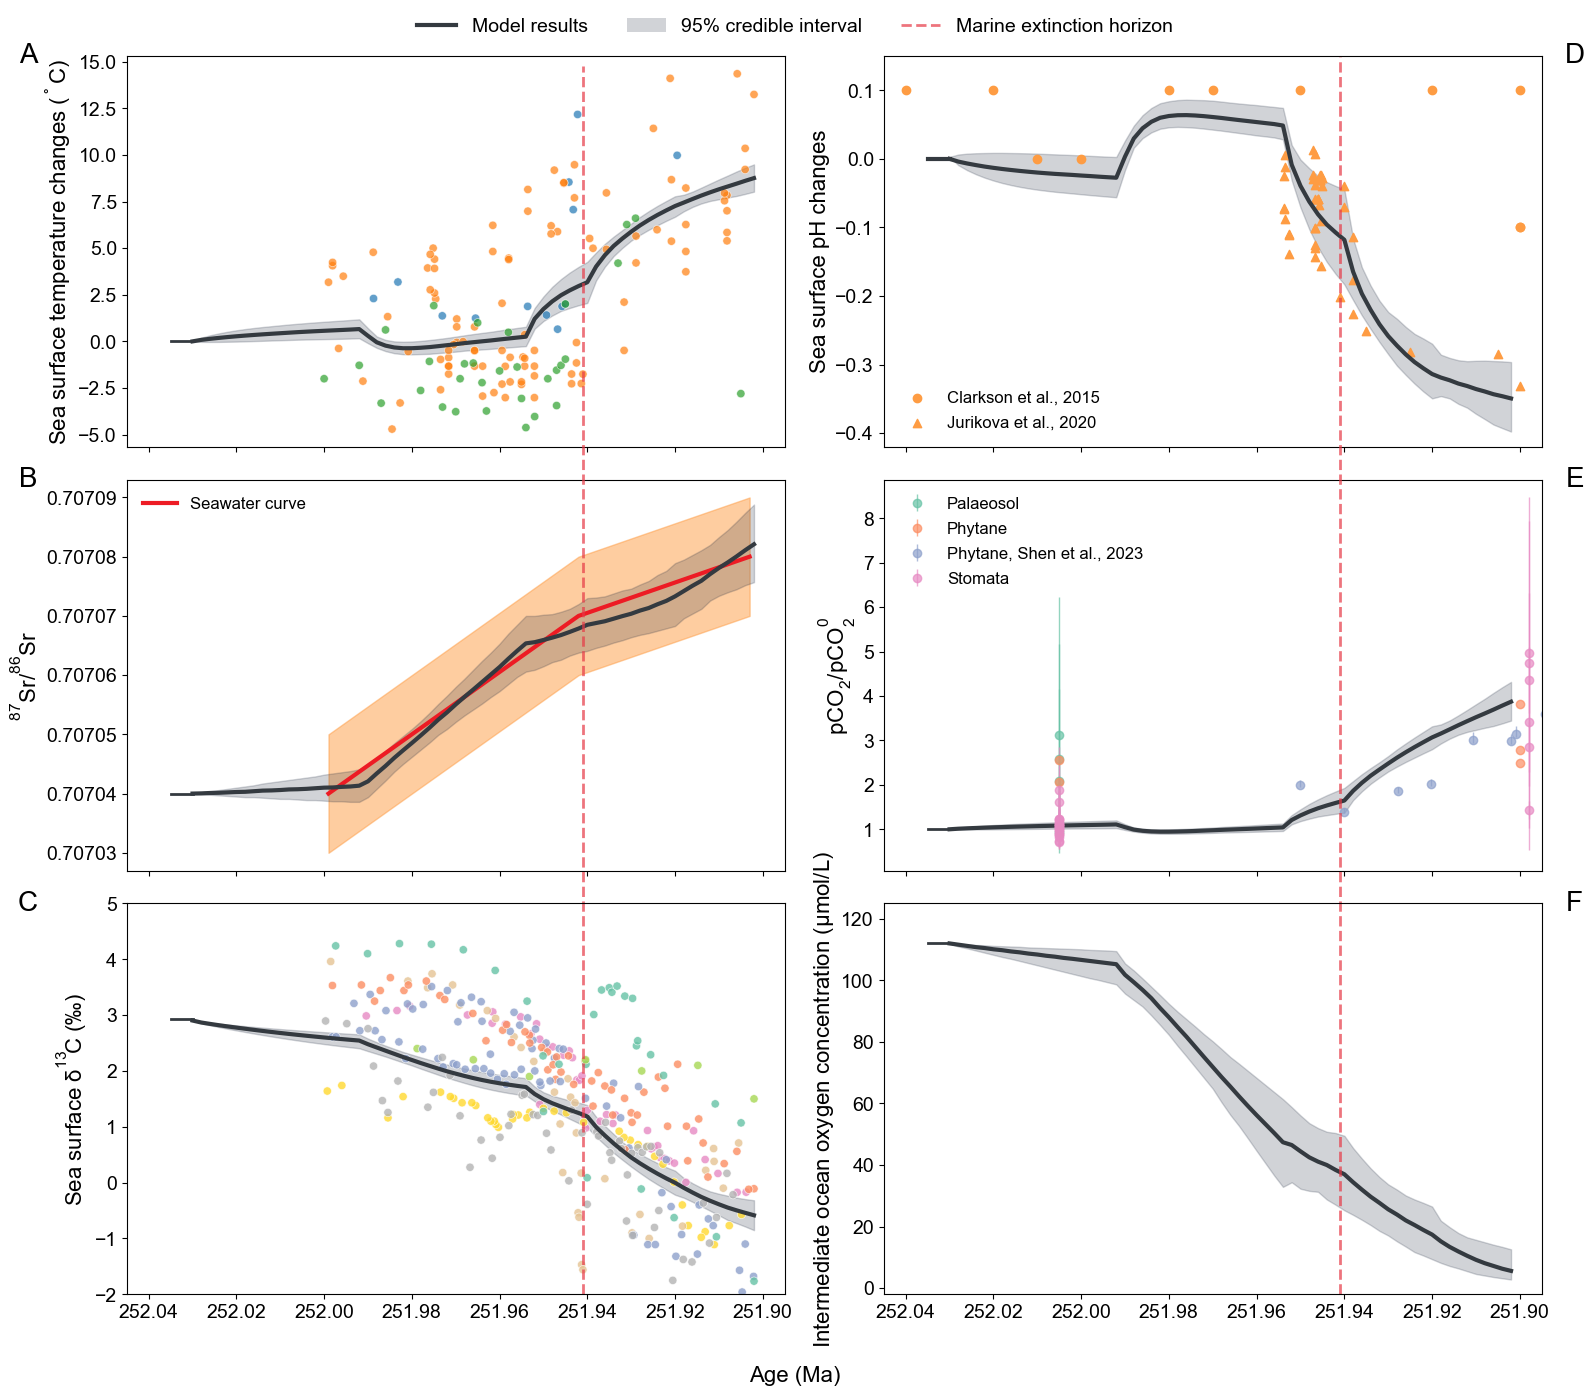

In [10]:

# # model results best fit with constant E
# temp_const_e = pd.read_csv(f'./mcmc_results_processing/sens_test_sclim_4_with_const_erosion/tcb.csv', usecols = [1]).values-22
# sr_const_e = pd.read_csv(f'./mcmc_results_processing/sens_test_sclim_4_with_const_erosion/Sr.csv', usecols = [1]).values
# ph_const_e = pd.read_csv(f'./mcmc_results_processing/sens_test_sclim_4_with_const_erosion/Surface_dic_alk_d13c_ph_dox.csv', usecols = [4]).values
# pco2_const_e = pd.read_csv(f'./mcmc_results_processing/sens_test_sclim_4_with_const_erosion/pco2_d13c.csv', usecols = [1]).values
# dox_interm_const_e =  pd.read_csv(f'./mcmc_results_processing/sens_test_sclim_4_with_const_erosion/Surface_dic_alk_d13c_ph_dox.csv', usecols = [6]).values
# dox_deep_const_e = pd.read_csv(f'./mcmc_results_processing/sens_test_sclim_4_with_const_erosion/Surface_dic_alk_d13c_ph_dox.csv', usecols = [7]).values
     

savefig = 1
deepflag = 0
version = 'v21'


mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14


fig, axes = plt.subplots(figsize = (16,14),nrows=3, ncols=2, sharex=True)

plt.ticklabel_format(useOffset=False)

proxy_color = '#ED1B24'
proxy_interval = '#FE9C43'
model_color = '#343a40'
model_interval = '#1b263b'


alpha_scatter = 0.8

alpha = 0.2

# Fig. 1 Temperature
axes[0,0].plot([252.035, (temp_q.index/-1e6)[0]], [0,0], lw = 2, color = model_color)
axes[0,0].plot(temp_q.index/-1e6, temp_q.iloc[:,3], lw = 3, color = model_color, label = 'Model results')
axes[0,0].fill_between(temp_q.index/-1e6, temp_q.iloc[:,0], temp_q.iloc[:,2], color = model_interval, alpha = alpha)
# axes[0].plot(pd_wu.index, pd_wu['T'], color = model_color, lw = 3, ls = '--', label = 'Wu et al., 2023')
# axes[0].plot(t_const_e/-1e6, temp_const_e, lw = 3, ls = '--', color = model_color, label = 'Constant erosion')

# if exp_name == 'sens_test_Meishan':
#     axes[0,0].scatter(d18o_meishan.index, (d18o_meishan.d18O - 20.42627)*-4.22, c = proxy_color, s = 10)
# else:

#     axes[0,0].fill_between(temp_q.index/-1e6, temp_q.iloc[:,0], temp_q.iloc[:,2], color = model_interval, alpha = alpha)
#     axes[0,0].plot(d18o_sm.index, (d18o_sm.d18o_mean - 19.984930)*-4.22,lw = 3, color = proxy_color, label = 'Proxy values')
#     axes[0,0].fill_between(d18o_sm.index,(d18o_sm.d18o_mean - 19.984930)*-4.22- d18o_sm['std']*4.22,
#                          (d18o_sm.d18o_mean - 19.984930)*-4.22+ d18o_sm['std']*4.22, color = proxy_interval, alpha = 0.5) 

sns.scatterplot(x='Age', y='Relative_T', hue='region', data=d18o_proxy, ax = axes[0,0], legend= False, alpha = .7) 
    
# Fig. 2 Sr
axes[1,0].plot(sr_curve.Age, sr_curve['87Sr/86Sr'],lw = 3, color = proxy_color, label = 'Seawater curve')

# axes[1].plot(t_const_e/-1e6, sr_const_e, lw = 3, ls = '--', color = model_color)

axes[1,0].fill_between(sr_curve.Age, sr_curve['87Sr/86Sr']-sr_curve['Uncertainty'], sr_curve['87Sr/86Sr']+sr_curve['Uncertainty'], color = proxy_interval, alpha = 0.5)

axes[1,0].plot(sr_q.index/-1e6, sr_q.iloc[:,3], lw = 3, color = model_color)
axes[1,0].plot([252.035, (sr_q.index/-1e6)[0]], [0.707040, 0.707040], lw = 2, color = model_color)

axes[1,0].fill_between(sr_q.index/-1e6, sr_q.iloc[:,0], sr_q.iloc[:,2], color = model_interval, alpha = alpha)

axes[1,0].ticklabel_format(useOffset=False)



# C. d13c
axes[2,0].plot([252.035, (d13c_q.index/-1e6)[0]], [2.9256,2.9256], lw = 2, color = model_color)

axes[2,0].plot(d13c_q.index/-1e6, d13c_q.iloc[:,3], lw = 3, color = model_color, label = 'Model results')
axes[2,0].fill_between(d13c_q.index/-1e6, d13c_q.iloc[:,0], d13c_q.iloc[:,2], color = model_interval, alpha = alpha)
# ss = sns.scatterplot(x='Age', y='d13c', hue='Section', data=d13c_proxy, palette = d13c_palette, ax = axes[2,0], legend= False, alpha = alpha_scatter) 
ss = sns.scatterplot(x='Age', y='d13c', hue='Section', data=d13c_proxy, palette = d13c_palette, ax = axes[2,0], legend= False, alpha = alpha_scatter) 


axes[2,0].set_ylim([-2, 5])
axes[2,0].set_xlabel('')

# Fig. 3 pCO2
# axes[2].set_yscale("log")
normalization = 425
axes[1,1].plot(pco2_q.index/-1e6, pco2_q.iloc[:,3]/normalization , lw = 3, color = model_color)
axes[1,1].plot([252.035, (pco2_q.index/-1e6)[0]], [425/normalization , 425/normalization ], lw = 2, color = model_color)

# axes[2].plot(t_const_e/-1e6, pco2_const_e, lw = 3, ls = '--', color = model_color)


axes[1,1].fill_between(pco2_q.index/-1e6, pco2_q.iloc[:,0]/normalization , pco2_q.iloc[:,2]/normalization , color = model_interval, alpha = alpha)

random.seed(8)
default = sns.color_palette("Set2", 4)
if normalization == 1 or 425:
    groups = pco2_proxy.groupby('proxy')
    i = 0
    for Age, group in groups:

#         if (group['proxy'] == 'Phytane, Shen et al., 2023').any():
#             group['pCO2'] = group['pCO2']/270
#             group['low_sd'] = group['low_sd']/270
#             group['high_sd'] = group['high_sd']/270
#         else:
#             group['pCO2'] = group['pCO2']/normalization
#             group['low_sd'] = group['low_sd']/normalization
#             group['high_sd'] = group['high_sd']/normalization
        
        group.plot("Age", "normalized", yerr = group[["low_sd", "high_sd"]].T.values , alpha = 0.7,
                   marker = "o", markersize = 6, c = default[i], elinewidth=1, ls = "", label = Age, ax = axes[1,1])
        i+=1
else:
    groups = pco2_proxy.groupby('Ref')
    for Age, group in groups:

        group.plot("Age", "normalized", yerr = group[["low", "high"]].T.values, 
                   marker = "o", markersize = 6, elinewidth=1, ls = "", label = Age,ax = axes[1,1])


# axes[1,1].errorbar(pco2_proxy.Age, pco2_proxy.normalized, yerr=pco2_proxy.low, fmt="o", 
#                    markerfacecolor=proxy_interval, alpha = 0.8,  markeredgewidth=0,
#                   ecolor = proxy_color)

# Fig. 4 pH
axes[0,1].plot(ph_q.index/-1e6, ph_q.iloc[:,3]-ph_q.iloc[0,3], lw = 3, color = model_color)
# axes[3].plot(t_const_e/-1e6, ph_const_e - ph_const_e[0], lw = 2, ls = '--', color = model_color)
axes[0,1].plot([252.035, (ph_q.index/-1e6)[0]], [0, 0], lw = 3, color = model_color)

axes[0,1].fill_between(ph_q.index/-1e6, ph_q.iloc[:,0]-7.9325, ph_q.iloc[:,2]-7.9325, color = model_interval, alpha = alpha)
# axes[0,1].fill_between(ph_q.index/-1e6, ph_q.iloc[:,0]-7.9663, ph_q.iloc[:,2]-7.9663, color = model_interval, alpha = alpha)

axes[0,1].scatter(ph_proxy.Age, ph_proxy.clarkson_relative, marker= 'o', color = proxy_interval, label = 'Clarkson et al., 2015')
axes[0,1].scatter(ph_proxy.AgeJ, ph_proxy.J_relative, marker = '^', color = proxy_interval, label = 'Jurikova et al., 2020')
# axes[3].plot(pd_wu.index, pd_wu.pH, ls = '--', lw = 3, color = model_color)

handles, labels = axes[0,1].get_legend_handles_labels()

axes[0,1].legend(handles[:] , labels[:] ,
              loc = 'lower left', 
              framealpha = 0, 
              borderaxespad=0.2, borderpad=0.8, labelspacing=0.6,
                  edgecolor='white', fontsize=12) 


axes[0,1].set_ylim([-0.42,0.15])
# axes[0,1].set_ylim([-0.65,0.2])

# Fig. 5 dox
if deepflag:
    axes[2,1].plot(dox_deep_q.index/-1e6, dox_deep_q.iloc[:,1]*1e3, lw = 3, color = model_color)
    axes[2,1].plot([252.035, (dox_deep_q.index/-1e6)[0]], [127.40, 127.40], lw = 2, color = model_color)

#     axes[4].plot(t_const_e/-1e6, dox_deep_const_e, lw = 3, ls = '--', color = model_color)

    axes[2,1].fill_between(dox_deep_q.index/-1e6, dox_deep_q.iloc[:,0], dox_deep_q.iloc[:,2], color = model_interval, alpha = alpha)

    # single inversion best fit
#     axes[4].plot(dox_deep.index, dox_deep[best_scenario], lw = 3, color = proxy_interval, ls = '--', label = 'best T scenario')
else:
    axes[2,1].plot(dox_interm_q.index/-1e6, dox_interm_q.iloc[:,1]*1e3, lw = 3, color = model_color)
    axes[2,1].plot([252.035, (dox_interm_q.index/-1e6)[0]], [dox_interm_q.iloc[0,1]*1e3, dox_interm_q.iloc[0,1]*1e3], lw = 2, color = model_color)

#     axes[4].plot(t_const_e/-1e6, dox_interm_const_e, lw = 3, ls = '--', color = model_color)
    
    axes[2,1].fill_between(dox_interm_q.index/-1e6, dox_interm_q.iloc[:,0]*1e3, dox_interm_q.iloc[:,2]*1e3, color = model_interval, alpha = alpha)

# single inversion best fit
#     axes[4].plot(dox_interm.index, dox_interm[best_scenario], lw = 3, color = proxy_interval, ls = '--', label = 'best T scenario')
# axes[4].plot(dox_deep.index, dox_deep[best_sr_scenario], lw =3, color = proxy_interval, ls = 'dotted', label = r'best $^{87}$Sr/$^{86}$Sr scenario')
# handles, labels = axes[4].get_legend_handles_labels()

# axes[4].legend(handles[:] , labels[:] ,
#               loc = 'lower right', 
#               framealpha = 0, 
#               borderaxespad=0.2, borderpad=0.8, labelspacing=0.6,
#                   edgecolor='white', fontsize=12) 


# yaxis
axes[0,0].set_ylabel(r'Sea surface temperature changes ($^\circ$C)')
axes[1,0].set_ylabel(r'$^{87}Sr$/$^{86}Sr$')
axes[2,0].set_ylabel(r"Sea surface $\delta^{13}\!C$ (" + u"\u2030" + ")")
if normalization ==425:
    axes[1,1].set_ylabel(r'pCO$_2$/pCO$_2^0$ ')
else:
        
    axes[1,1].set_ylabel(r'pCO$_2$ (ppmv)')
axes[0,1].set_ylabel('Sea surface pH changes')
if deepflag:
    axes[2,1].set_ylabel(r'Deep ocean oxygen concentration ($\mu$mol/L)')
    
else:
    axes[2,1].set_ylabel(r'Intermediate ocean oxygen concentration ($\mu$mol/L)')
    axes[2,1].set_ylim([-2,125])
        
# ax.set_ylabel(r'Emissions (Gt C $yr^{-1}$)')
# axes[3].set_ylabel('Cumulative emissions (Gt C)')
# axes[0].set_ylim([-2,10])



# xaxis
fig.supxlabel('Age (Ma)', fontsize=16, y=-0.01)

# x range
plt.setp(axes, xlim=[251.895, 252.045])

# # legend

# handles, labels = axes[0,0].get_legend_handles_labels()

# axes[0,0].legend(handles[0:1] , labels[0:1] ,
#                loc = 'center right', bbox_to_anchor = (1.0,1.1),
#               framealpha = 0, 
#               borderaxespad=0.2, borderpad=0.8, labelspacing=0.6,
#                   edgecolor='white', fontsize=14) 

axes[1,0].legend( borderaxespad=0.2, borderpad=0.8, labelspacing=0.6,
                  edgecolor='white', fontsize=12, loc = 'upper left')
axes[2,0].plot([251.941, 251.941], [-2, 20], color='#e63946', lw=2, ls = '--',  alpha = 0.7, clip_on = False)
axes[2,1].plot([251.941, 251.941], [-2, 400], color='#e63946', lw=2, ls = '--',  alpha = 0.7, clip_on = False)

handles, labels = axes[1,1].get_legend_handles_labels()

axes[1,1].legend(handles , labels ,
              loc = 'upper left', 
              framealpha = 0, 
              borderaxespad=0.2, borderpad=0.8, labelspacing=0.6,
                  edgecolor='white', fontsize=12) 


axes[0,0].text(-0.15, 1.0, 'A', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[0,0].transAxes)
axes[1,0].text(-0.15, 1.0, 'B', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[1,0].transAxes)
axes[2,0].text(-0.15, 1.0, 'C', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[2,0].transAxes)
axes[0,1].text(1.05, 1.0, 'D', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[0,1].transAxes)
axes[1,1].text(1.05, 1.0, 'E', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[1,1].transAxes)
axes[2,1].text(1.05, 1.0, 'F', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[2,1].transAxes)


plt.gca().invert_xaxis()


# =========================
# GLOBAL LEGEND (TOP)
# =========================
global_handles = [
    Line2D([0], [0], color=model_color, lw=3, label='Model results'),
    Patch(facecolor=model_interval, alpha=alpha, label='95% credible interval'),
    Line2D([0], [0], color='#e63946', lw=2, ls='--', alpha = 0.7, label='Marine extinction horizon')
]

fig.legend(
    handles=global_handles,
    loc='upper center',
    ncol=3,
    frameon=False,
    fontsize=14,
    bbox_to_anchor=(0.5, 0.98)
)


# Make room for the top legend (important when saving)
plt.tight_layout(rect=[0, 0, 1, 0.96])

if savefig:
    plt.savefig(f'./figs/Fig3_{exp_name}_{deepflag}_{version}.png', facecolor='w', dpi = 300)
    plt.savefig(f'./figs/Fig3_{exp_name}_{deepflag}_{version}.pdf', dpi = 1200)
 


In [11]:
# Fig. 4 Forcing
# calculate the cumulative C emission
save_file = 1
Age = np.round(np.arange(-252.03e6, -251.90e6,2e3),3)

n = forcing_mcmc.shape[1]
if  forcing_mcmc.shape[0]== 12:
    t_interval = np.array([40e3, 36e3, 14e3, 20e3, 18e3])
    emi_interval = np.zeros((6, n))
    erosion_interval = np.zeros((6,n))
    emi_rate = forcing_mcmc[0:5, :]
    early_index = 2
    early_ero_index = 3
    for i in range(n):
        emi_interval[0,i] = 0
        emi_interval[1:,i] = forcing_mcmc[0:5,i] * t_interval

        erosion_interval[:5,i]=forcing_mcmc[5:10,i]
        erosion_interval[5,i] = 1
elif forcing_mcmc.shape[0] == 14:
    t_interval = np.array([40e3, 36e3, 10e3, 18e3, 24e3, 18e3])
    emi_interval = np.zeros((7, n))
    erosion_interval = np.zeros((7,n))
    emi_rate = forcing_mcmc[0:6, :]
    early_index = 4
    early_ero_index = 4
    for i in range(n):
        emi_interval[0,i] = 0
        emi_interval[1:,i] = forcing_mcmc[0:6,i] * t_interval

        erosion_interval[:6,i]=forcing_mcmc[6:12,i]
        erosion_interval[6,i] = 1

    
elif forcing_mcmc.shape[0] == 22:
    t_interval = np.array([1,1.4,0.6,1,0.6,1.4,1,1,1,1])*1e4
    emi_interval = np.zeros((11, n))
    erosion_interval = np.zeros((11,n))
    emi_rate = forcing_mcmc[0:10, :]
    early_index = 5
    early_ero_index = 6
    for i in range(n):
        emi_interval[0,i] = 0
        emi_interval[1:,i] = forcing_mcmc[0:10,i] * t_interval

        erosion_interval[:10,i]=forcing_mcmc[10:20,i]
        erosion_interval[10,i] = 1



cum_emi = emi_interval.cumsum(axis=0)
pd_emi_rate = pd.DataFrame(emi_rate)
pd_cum_emi = pd.DataFrame(cum_emi)
pd_erosion_interval = pd.DataFrame(erosion_interval)
if forcing_mcmc.shape[0]== 12:
    pd_cum_emi.index = np.array([252.03, 251.99, 251.954, 251.94, 251.92, 251.902])
    pd_erosion_interval.index = np.array([252.03, 251.99, 251.954, 251.94, 251.92, 251.90 ])
    pd_emi_rate.index = np.array([252.03, 251.999, 251.954, 251.94, 251.92])
    
elif forcing_mcmc.shape[0] == 14:
    pd_cum_emi.index = np.array([252, 251.982, 251.972, 251.962, 251.944, 251.92, 251.902])
    pd_erosion_interval.index = np.array([252, 251.982, 251.972, 251.962, 251.944, 251.92, 251.902])
    pd_emi_rate.index =np.array([252, 251.982, 251.972, 251.962, 251.944, 251.92])
    
elif forcing_mcmc.shape[0] == 22:
    pd_cum_emi.index = np.array([-252e6, -251.99e6,  -251.976e6, -251.97e6, -251.96e6, -251.954e6, -251.94e6, -251.93e6, -251.92e6, -251.91e6, -251.902e6])/-1e6
    pd_erosion_interval.index = np.array([-252e6, -251.99e6,  -251.98e6, -251.97e6, -251.96e6, -251.95e6, -251.94e6, -251.93e6, -251.92e6, -251.91e6, -251.902e6])/-1e6
    pd_emi_rate.index = np.array([-252e6, -251.99e6,  -251.976e6, -251.97e6, -251.96e6, -251.954e6, -251.94e6, -251.93e6, -251.92e6, -251.91e6])/-1e6
    
emi_rate_q = pd_emi_rate.quantile([0.025, 0.16, 0.5, 0.84, 0.975], axis = 1).T
emi_rate_q['mean'] = pd_emi_rate.mean(axis = 1)
    
cum_emi_q = pd_cum_emi.quantile([0.025,0.16, 0.5, 0.84, 0.975], axis = 1).T
cum_emi_q['mean'] = pd_cum_emi.mean(axis=1)

erosion_interval_q = pd_erosion_interval. quantile([0.025, 0.16, 0.5, 0.84, 0.975], axis = 1).T
erosion_interval_q['mean'] = erosion_interval_q.mean(axis = 1)

# pd_d13c_emi = pd.DataFrame(d13c_emi_mcmc)
# pd_d13c_emi.index = Age
# d13c_emi_q = pd_d13c_emi.quantile([0.025, 0.16, 0.5, 0.84, 0.975], axis = 1).T
# d13c_emi_q['mean'] = d13c_emi_q.mean(axis = 1)

cum_times_d13c = np.zeros(n)
d13c_emi = np.zeros((3, n))
ave_erosion = np.zeros((2,n))
cum_emi_second = np.zeros(n)
for i in range(n):
    if forcing_mcmc.shape[0] == 12:
        cum_times_d13c[i] = forcing_mcmc[10,i] * cum_emi[2,i] + forcing_mcmc[11,i] * (cum_emi[-1,i] - cum_emi[2,i])
    elif forcing_mcmc.shape[0] == 14:
        cum_times_d13c[i] = forcing_mcmc[12,i] * cum_emi[3,i] + forcing_mcmc[13,i] * (cum_emi[-1,i]-cum_emi[3,i])
    elif forcing_mcmc.shape[0] == 22:
        cum_times_d13c[i] = forcing_mcmc[20,i] * cum_emi[5,i] + forcing_mcmc[21,i] * (cum_emi[-1,i]-cum_emi[5,i])
     
    d13c_emi[0,i] = cum_times_d13c[i]/cum_emi[-1,i] # average
#     ave_d13c[1,i] = np.sum(cum_times_d13c[0:early_index,i])/cum_emi[early_index, i]  # eraly phase
#     ave_d13c[2,i] = np.sum(cum_times_d13c[early_index:,i])/(cum_emi[-1, i]-cum_emi[early_index,i])  # late phase
    ave_erosion[0,i] = sum(pd_erosion_interval.iloc[0:early_ero_index,i] * t_interval[0:early_ero_index])/sum(t_interval[0:early_ero_index])
    ave_erosion[1,i] = sum(pd_erosion_interval.iloc[early_ero_index:-1,i] * t_interval[early_ero_index:])/sum(t_interval[early_ero_index:])
    cum_emi_second[i] = (cum_emi[-1, i]-cum_emi[early_index,i])
# pd_ave_d13c = pd.DataFrame(ave_d13c)
# pd_ave_d13c_q = pd_ave_d13c.quantile([0.025, 0.16, 0.5, 0.84, 0.975], axis = 1).T
# pd_ave_d13c_q.index = ['All', 'Phase 1', 'Phase 2']
# pd_ave_d13c_q['mean'] = ave_d13c.mean(axis = 1)

pd_ave_erosion = pd.DataFrame(ave_erosion)
pd_ave_ero_q = pd_ave_erosion.quantile([0.025, 0.16, 0.5, 0.84, 0.975], axis = 1).T
pd_ave_ero_q.index = ['Phase 1', 'Phase 2']
pd_ave_ero_q['mean'] = ave_erosion.mean(axis = 1)

pd_cum_emi_second_q = pd.DataFrame(np.quantile(cum_emi_second, q=[0.025, 0.16, 0.5, 0.84, 0.975] )).T
pd_cum_emi_second_q['mean'] = np.mean(cum_emi_second)

if forcing_mcmc.shape[0] == 12:
    d13c_emi[1:,:] = forcing_mcmc[10:,:]
elif forcing_mcmc.shape[0] == 14:
     d13c_emi[1:,:] = forcing_mcmc[12:,:]
elif forcing_mcmc.shape[0] == 22:
     d13c_emi[1:,:] = forcing_mcmc[20:,:]
pd_d13c_emi =  pd.DataFrame(d13c_emi)
pd_d13c_emi_q = pd_d13c_emi.quantile([0.025, 0.16, 0.5, 0.84, 0.975], axis = 1).T
pd_d13c_emi_q.index = ['All', 'Phase 1', 'Phase 2']
pd_d13c_emi_q['mean'] = d13c_emi.mean(axis = 1)

if save_file:
    writer = pd.ExcelWriter(f'./data/forcing_{exp_name}_results.xlsx')
    cum_emi_q.to_excel(writer,sheet_name='cum_emi')
    erosion_interval_q.to_excel(writer,sheet_name='erosion')
    pd_d13c_emi_q.to_excel(writer,sheet_name='d13c')
    emi_rate_q.to_excel(writer,sheet_name='emi_rate')
#     pd_ave_d13c_q.to_excel(writer, sheet_name='ave_d13c')
    pd_ave_ero_q.to_excel(writer, sheet_name='ave_erosion')
    pd_cum_emi_second_q.to_excel(writer, sheet_name = 'cum_emi_late')
    writer.close()



In [12]:
cum_emi_q

,0.025,0.16,0.5,0.84,0.975,mean
252.030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
251.990,429.252567,542.163574,753.202789,1000.949268,1256.013072,772.856685
251.954,3823.120737,4294.165308,4779.802481,5298.804051,5820.663717,4794.299979
251.940,5536.127058,6010.552281,6532.034790,7052.632896,7522.762954,6537.127719
251.920,10431.972258,10992.224481,11603.883093,12249.662671,12876.006549,11622.307158
251.902,14602.570926,15677.403903,16823.304423,18095.347444,19240.286662,16871.534464


In [14]:
if forcing_mcmc.shape[0]==12:
    pd_erosion_interval = pd.DataFrame(erosion_interval)
    pd_erosion_interval.index = np.array([252.03, 251.99, 251.954, 251.94, 251.92, 251.90 ])
    
    fe_lower = interpolate.interp1d(-np.array([252.03, 251.99, 251.954, 251.94, 251.92, 251.90]), erosion_interval_q.iloc[:,0], bounds_error = False, kind = 'zero', fill_value = 1)
    fe_m = interpolate.interp1d(-np.array([252.03, 251.99, 251.954, 251.94, 251.92, 251.90]), erosion_interval_q.iloc[:,5], bounds_error = False, kind = 'zero', fill_value = 1)
    fe_upper = interpolate.interp1d(-np.array([252.03, 251.99, 251.954, 251.94, 251.92, 251.90]), erosion_interval_q.iloc[:,4], bounds_error = False, kind = 'zero', fill_value = 1)
elif forcing_mcmc.shape[0]==14: # Meishan
    t_index = np.array([252, 251.982, 251.972, 251.962, 251.944, 251.92, 251.902])
    pd_erosion_interval.index = t_index
    
    fe_lower = interpolate.interp1d(-t_index, erosion_interval_q.iloc[:,0], bounds_error = False, kind = 'zero', fill_value = 1)
    fe_m = interpolate.interp1d(-t_index, erosion_interval_q.iloc[:,5], bounds_error = False, kind = 'zero', fill_value = 1)
    fe_upper = interpolate.interp1d(-t_index, erosion_interval_q.iloc[:,4], bounds_error = False, kind = 'zero', fill_value = 1)

    
    
    
elif forcing_mcmc.shape[0]==22: # 10 kyr res
    pd_erosion_interval.index = np.linspace(252,251.90,11)

    fe_lower = interpolate.interp1d(-np.linspace(252,251.90,11), erosion_interval_q.iloc[:,0], bounds_error = False, kind = 'zero', fill_value = 1)
    fe_m = interpolate.interp1d(-np.linspace(252,251.90,11), erosion_interval_q.iloc[:,5], bounds_error = False, kind = 'zero', fill_value = 1)
    fe_upper = interpolate.interp1d(-np.linspace(252,251.90,11), erosion_interval_q.iloc[:,4], bounds_error = False, kind = 'zero', fill_value = 1)

    
    

In [15]:
c1l = pd_d13c_emi_q.iloc[1,0]
c1h = pd_d13c_emi_q.iloc[1,4]
c2l = pd_d13c_emi_q.iloc[2,0]
c2h = pd_d13c_emi_q.iloc[2,4]

/var/folders/2d/_7xzh6bn21j63blbvch80_3h0000gs/T/ipykernel_31840/1919521239.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[2].plot(np.array([-252.03e6, -251.954e6])/-1e6, [pd_d13c_emi_q['mean'][1], pd_d13c_emi_q['mean'][1]],lw = 3, color = model_color, )
/var/folders/2d/_7xzh6bn21j63blbvch80_3h0000gs/T/ipykernel_31840/1919521239.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[2].plot(np.array([-251.954e6, -251.902e6])/-1e6, [pd_d13c_emi_q['mean'][2], pd_d13c_emi_q['mean'][2]],lw = 3, color = model_color, )


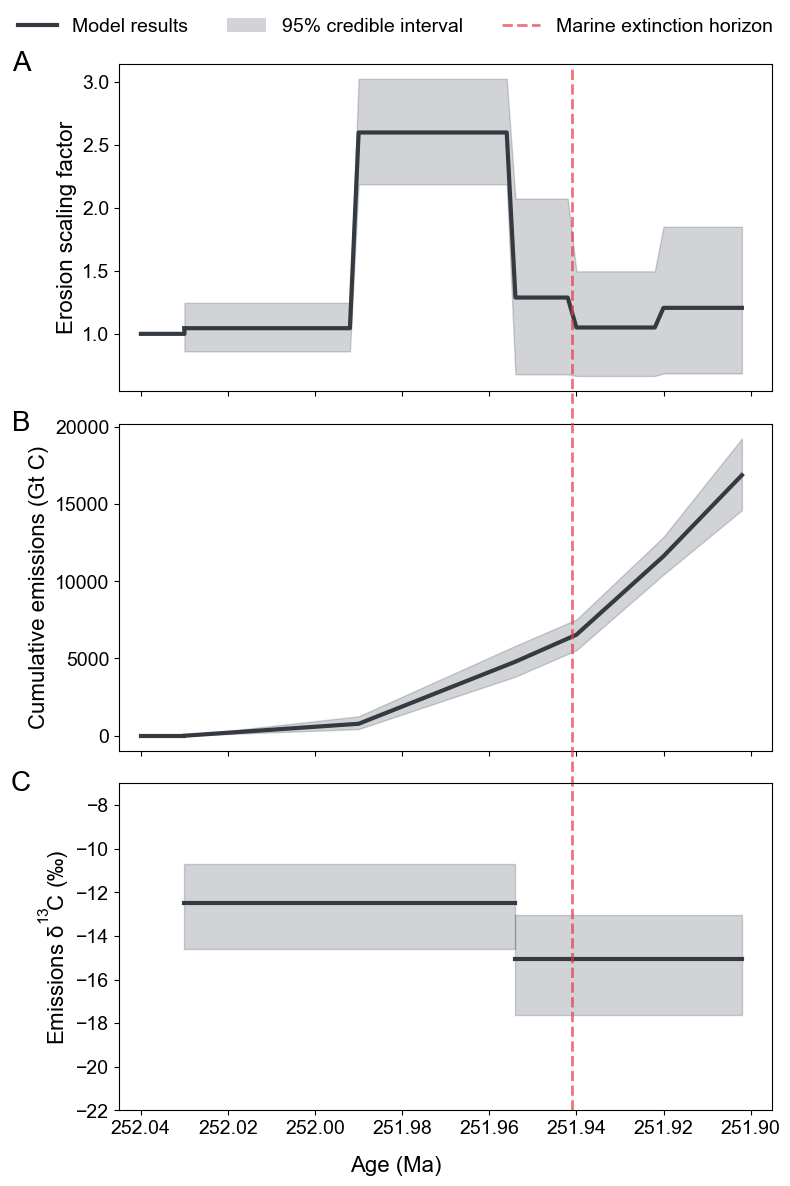

In [21]:

savefig = 1

fig, axes = plt.subplots(figsize = (8,12),nrows=3, ncols=1, sharex=True)

plt.ticklabel_format(useOffset=False)


mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

proxy_color = '#ED1B24'
proxy_interval = '#FE9C43'
model_color = '#343a40'
model_interval = '#1b263b'

alpha = 0.2

# Fig. 4a Erosion
axes[0].plot(Age/-1e6, fe_m(Age/1e6), lw = 3, color = model_color, label = 'Model results')
axes[0].plot([252.04, 252.030001,Age[0]/-1e6], [1,1,fe_m(Age[0]/1e6) ], lw = 3, color = model_color)
axes[0].fill_between(Age/-1e6, fe_lower(Age/1e6), fe_upper(Age/1e6), color = model_interval, alpha = alpha)


# Fig. 4b Carbon emission
axes[1].plot(cum_emi_q.index, cum_emi_q.iloc[:,5], lw = 3, color = model_color, label = 'Model results')
axes[1].fill_between(cum_emi_q.index, cum_emi_q.iloc[:,0], cum_emi_q.iloc[:,4], color = model_interval, alpha = alpha)
axes[1].plot([252.04, 252.03], [0,0 ], lw = 3, color = model_color)


# Fig. 4c d13c
axes[2].plot(np.array([-252.03e6, -251.954e6])/-1e6, [pd_d13c_emi_q['mean'][1], pd_d13c_emi_q['mean'][1]],lw = 3, color = model_color, )
axes[2].fill_between(np.array([-252.03e6, -251.954e6])/-1e6,  [c1l, c1l] , [c1h, c1h], color = model_interval, alpha = alpha)

axes[2].plot(np.array([-251.954e6, -251.902e6])/-1e6, [pd_d13c_emi_q['mean'][2], pd_d13c_emi_q['mean'][2]],lw = 3, color = model_color, )
axes[2].fill_between(np.array([-251.954e6, -251.902e6])/-1e6,  [c2l, c2l] , [c2h, c2h], color = model_interval, alpha = alpha)
axes[2].set_ylim([-22, -7])
# axes[2].legend(handles[:] , labels[:] ,
#               loc = 'lower right', 
#               framealpha = 0, 
#               borderaxespad=0.2, borderpad=0.8, labelspacing=0.6,
#                   edgecolor='white', fontsize=12) 


# yaxis
axes[0].set_ylabel(r'Erosion scaling factor')
axes[1].set_ylabel(r'Cumulative emissions (Gt C)')
axes[2].set_ylabel(r"Emissions $\delta^{13}\!C$ (" + u"\u2030" + ")")

# ax.set_ylabel(r'Emissions (Gt C $yr^{-1}$)')
# axes[3].set_ylabel('Cumulative emissions (Gt C)')



# xaxis
fig.supxlabel('Age (Ma)', fontsize = 16)

# x range
plt.setp(axes, xlim=[251.895, 252.045])

# # legend

# axes[0].legend( borderaxespad=0.2, borderpad=0.8, labelspacing=0.6,
#                   edgecolor='white', fontsize=12, loc = 'center right', bbox_to_anchor = (0.95,1.1),
#                 ncol = 3 )
# axes[2].plot([0.49, 0.49], [0.06, 0.99], color='#ae2012', lw=2, ls = '--', 
#          transform=fig.transFigure, clip_on=False)

handles, labels = axes[2].get_legend_handles_labels()

axes[0].text(-0.15, 1.0, 'A', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[0].transAxes)
axes[1].text(-0.15, 1.0, 'B', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[1].transAxes)
axes[2].text(-0.15, 1.0, 'C', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[2].transAxes)

plt.tight_layout()
plt.gca().invert_xaxis()

# axes[2].plot([251.941, 251.941], [-20, 21], color='#e63946', lw=2, ls = '--',  alpha = 0.7, clip_on = False)

axes[2].plot([251.941, 251.941], [-22, 25.8], color='#e63946', lw=2, ls = '--',  alpha = 0.7, clip_on = False)

# =========================
# GLOBAL LEGEND (TOP)
# =========================
global_handles = [
    Line2D([0], [0], color=model_color, lw=3, label='Model results'),
    Patch(facecolor=model_interval, alpha=alpha, label='95% credible interval'),
    Line2D([0], [0], color='#e63946', lw=2, ls='--', alpha = 0.7, label='Marine extinction horizon')
]

fig.legend(
    handles=global_handles,
    loc='upper center',
    ncol=3,
    frameon=False,
    fontsize=14,
    bbox_to_anchor=(0.5, 0.99)
)


# Make room for the top legend (important when saving)
plt.tight_layout(rect=[0, 0, 1, 0.96])


if savefig:
    plt.savefig(f'./figs/Fig4_MCMC_forcing_{exp_name}_{version}.png', dpi = 600)
    plt.savefig(f'./figs/Fig4_MCMC_forcing_{exp_name}_{version}.pdf', dpi = 600)
    # plt.savefig(f'Fig4_MCMC_forcing_{exp_name}_{version}.svg', format = 'svg', dpi = 1200)

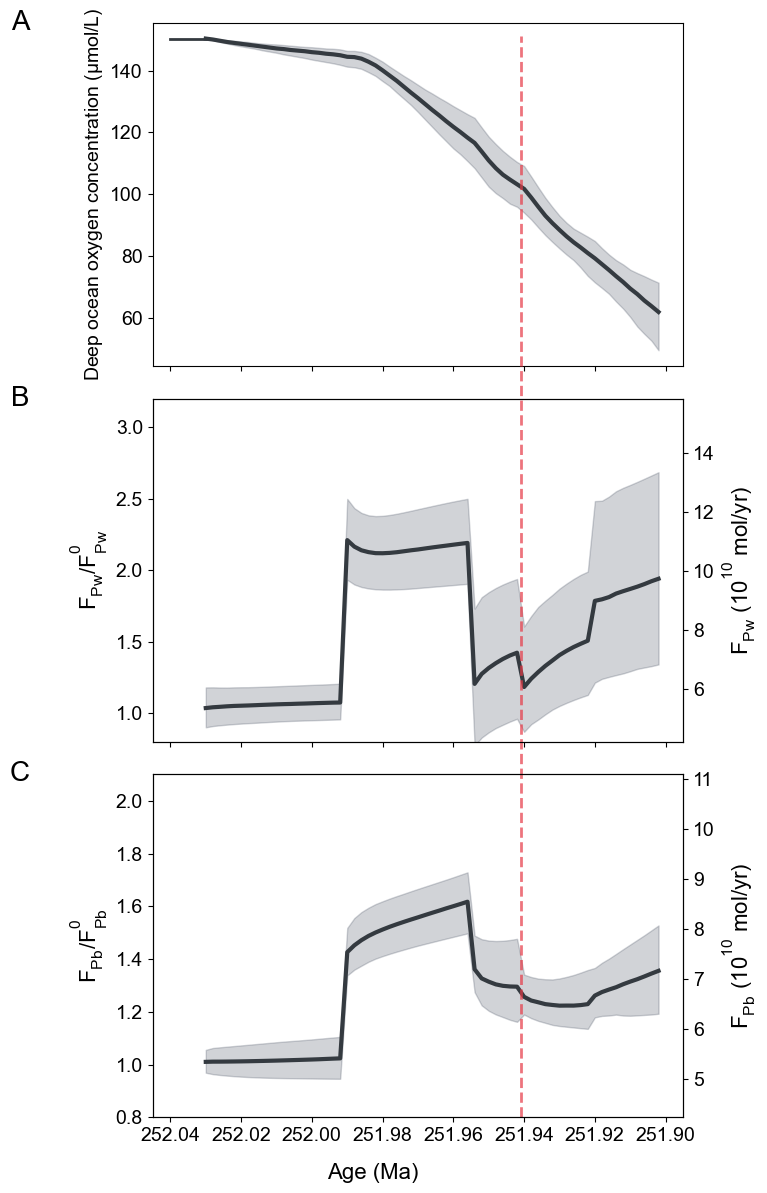

In [24]:
# extended datafigure 1, silicate weathering flux evolution

savefig = 1

fig, axes = plt.subplots(figsize = (8,12),nrows=3, ncols=1, sharex=True)

plt.ticklabel_format(useOffset=False)


mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

proxy_color = '#ED1B24'
proxy_interval = '#FE9C43'
model_color = '#343a40'
model_interval = '#1b263b'

alpha = 0.2

# Fig. s1a deep oxygen
unit_convert = 1000
axes[0].plot(dox_deep_q.index/-1e6, dox_deep_q.iloc[:,1]*unit_convert, lw = 3, color = model_color)
axes[0].plot([252.04, (dox_deep_q.index/-1e6)[0]], [dox_deep_q.iloc[0,1]*unit_convert, dox_deep_q.iloc[0,1]*unit_convert], lw = 2, color = model_color)

axes[0].fill_between(dox_deep_q.index/-1e6, dox_deep_q.iloc[:,0]*unit_convert, dox_deep_q.iloc[:,2]*unit_convert, color = model_interval, alpha = alpha)

# Fig. s1b fpw


axes[1].plot(r_fpw_q.index/-1e6, r_fpw_q.iloc[:,1], lw = 3, color = model_color, label = 'Model results')
axes[1].fill_between(r_fpw_q.index/-1e6, r_fpw_q.iloc[:,0], r_fpw_q.iloc[:,2], color = model_interval, alpha = alpha)

ax1 = axes[1].twinx()
axes[1].set_ylim([0.8,3.2])
ax1.set_ylim([0.8*5.28, 3*5.28])
ax1.ticklabel_format(useOffset=False)

axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))


# Fig. s1c fbp
axes[2].plot(fbP_q.index/-1e6, fbP_q.iloc[:,1]/5.28e10, lw = 3, color = model_color, label = 'Model results')
axes[2].fill_between(fbP_q.index/-1e6, fbP_q.iloc[:,0]/5.28e10, fbP_q.iloc[:,2]/5.28e10, color = model_interval, alpha = alpha)

ax2 = axes[2].twinx()
axes[2].set_ylim([0.8,2.1])
ax2.set_ylim([0.8*5.28, 2.1*5.28])




# yaxis
axes[0].set_ylabel(r'Deep ocean oxygen concentration ($\mu$mol/L)', fontsize = 14)
axes[1].set_ylabel(r'F$_{Pw}$/F$_{Pw}^0$')
axes[2].set_ylabel(r'F$_{Pb}$/F$_{Pb}^0$')

ax1.set_ylabel(r'F$_{Pw}$ (10$^{10}$ mol/yr)')
ax2.set_ylabel(r'F$_{Pb}$ (10$^{10}$ mol/yr)')

# ax.set_ylabel(r'Emissions (Gt C $yr^{-1}$)')
# axes[3].set_ylabel('Cumulative emissions (Gt C)')



# xaxis
fig.supxlabel('Age (Ma)', fontsize = 16)

# x range
plt.setp(axes, xlim=[251.895, 252.045])



axes[0].text(-0.25, 1.0, 'A', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[0].transAxes)
axes[1].text(-0.25, 1.0, 'B', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[1].transAxes)
axes[2].text(-0.25, 1.0, 'C', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[2].transAxes)

plt.tight_layout()
plt.gca().invert_xaxis()

axes[2].plot([251.941, 251.941], [0.8, 4.9], color='#e63946', lw=2, ls = '--',  alpha = 0.7, clip_on = False)

if savefig:
    plt.savefig(f'./figs/FigS1_Pflux_{exp_name}_{version}.png', dpi = 600)
    plt.savefig(f'./figs/FigS1_Pflux_{exp_name}_{version}.pdf', dpi = 600)
    # plt.savefig(f'FigS1_Pflux_{exp_name}_{version}.svg', format = 'svg', dpi = 1200)

In [16]:
### Results for table Sxxx

In [25]:
# Average erosion in two intervals
df = pd_ave_ero_q.copy()

out = {}

for phase in df.index:
    mean = df.loc[phase, "mean"]
    low = df.loc[phase, 0.025]
    high = df.loc[phase, 0.975]
    
    plus = high - mean
    minus = mean - low
    
    out[phase] = f"{mean:.1f} + {plus:.1f} − {minus:.1f}"

summary = pd.DataFrame.from_dict(
    out, orient="index", columns=["Mean (95% CI)"]
)

print('Average Erosion in two phases')
print(summary)

Average Erosion in two phases
           Mean (95% CI)
Phase 1  1.7 + 0.1 − 0.1
Phase 2  1.1 + 0.4 − 0.3


In [26]:
# Total emission

df = cum_emi_q.copy()

out = {}

for idx in df.index:
    mean = df.loc[idx, "mean"]
    low = df.loc[idx, 0.025]
    high = df.loc[idx, 0.975]

    mean_k = mean / 1e3
    plus_k = (high - mean) / 1e3
    minus_k = (mean - low) / 1e3

    out[idx] = f"{mean_k:.1f} + {plus_k:.1f} − {minus_k:.1f}"

summary = pd.DataFrame.from_dict(
    out, orient="index", columns=["Cumulative emissions (×10³ Gt C)"]
)

print('total emission')
print(summary)

total emission
        Cumulative emissions (×10³ Gt C)
252.030                  0.0 + 0.0 − 0.0
251.990                  0.8 + 0.5 − 0.3
251.954                  4.8 + 1.0 − 1.0
251.940                  6.5 + 1.0 − 1.0
251.920                 11.6 + 1.3 − 1.2
251.902                 16.9 + 2.4 − 2.3


In [27]:
df = pd_cum_emi_second_q.copy()

mean = df.loc[0, "mean"]
low = df.loc[0, 0]
high = df.loc[0, 4]

plus = high - mean
minus = mean - low

result = f"{mean/1e3:.1f} +{plus/1e3:.1f} -{minus/1e3:.1f}"

print('second phase emission')
print(result)

second phase emission
12.1 +2.9 -2.7


In [28]:
pd_d13c_emi_q

,0.025,0.16,0.5,0.84,0.975,mean
All,-15.482639,-14.852665,-14.255014,-13.683549,-13.189179,-14.269156
Phase 1,-14.608140,-13.473714,-12.448076,-11.500801,-10.716259,-12.498211
Phase 2,-17.616745,-16.265800,-14.975368,-13.907561,-13.043697,-15.075994


In [29]:
for idx in pd_d13c_emi_q.index:
    mean = pd_d13c_emi_q.loc[idx, "mean"]
    low  = pd_d13c_emi_q.loc[idx, 0.025]
    high = pd_d13c_emi_q.loc[idx, 0.975]

    minus = mean - low
    plus  = high - mean

    print(f"{idx}: {mean:.1f} −{minus:.1f} +{plus:.1f}")

All: -14.3 −1.2 +1.1
Phase 1: -12.5 −2.1 +1.8
Phase 2: -15.1 −2.5 +2.0


In [30]:
# Ensure Age is in Ma and rounded to 3 decimals
def env_print(temp_q):
    df = temp_q.copy()
    df.index = np.round(df.index / 1e6, 3)
    
    target_ages = [-251.954, -251.94, -251.902]
    for age in target_ages:
        row = df.loc[age]
    
        mean = row["mean"]
        low = row["q2.5"]
        high = row["q97.5"]
    
        minus = mean - low
        plus = high - mean
    
        print(
            f"{age:.3f} Ma: "
            f"{mean:.2f} −{minus:.2f} +{plus:.2f} "
        )

In [31]:
env_print(temp_q)

-251.954 Ma: 0.25 −0.51 +0.53 
-251.940 Ma: 3.17 −1.11 +1.09 
-251.902 Ma: 8.76 −0.73 +0.74 


In [32]:
df_ph = ph_q-ph_q.iloc[0,3]
env_print(df_ph)

-251.954 Ma: 0.05 −0.02 +0.02 
-251.940 Ma: -0.12 −0.07 +0.07 
-251.902 Ma: -0.35 −0.05 +0.05 


In [33]:
env_print(pco2_q)

-251.954 Ma: 442.95 −34.29 +36.73 
-251.940 Ma: 699.83 −115.76 +120.33 
-251.902 Ma: 1645.31 −180.60 +189.63 


In [34]:
dox_interm_q = dox_interm_q*1000
env_print(dox_interm_q)

-251.954 Ma: 47.23 −14.33 +14.17 
-251.940 Ma: 37.27 −11.97 +12.23 
-251.902 Ma: 7.00 −4.20 +5.60 


In [35]:
dox_deep_q = dox_deep_q*1000
env_print(dox_deep_q)

-251.954 Ma: 116.57 −8.17 +8.13 
-251.940 Ma: 101.60 −7.60 +7.50 
-251.902 Ma: 60.83 −11.43 +10.47 


In [36]:
env_print(po4_ave_q)

-251.954 Ma: 2.58 −0.21 +0.22 
-251.940 Ma: 2.60 −0.20 +0.20 
-251.902 Ma: 3.17 −0.38 +0.41 


In [37]:
exp_name

'd13c_sens_test_timelag_80'